# Oscar Dominguez

# Date 05/12/2023

# Discrete Distributions 

The features to analyze: 
- VitD_levels
- Doc_visits
- TotalCharge

1. Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

2. Answer the following questions:
- Is it Discrete or Continuous?
- Does it have a skew? If so, which direction (+/-)
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)


In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
from IPython import display

df = pd.read_csv("Data/data.csv")
df

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,VA,37.13892,-81.06430,Suburban,3.0,23,37655.11,Separated,Male,0,...,1.0,0.0,0.0,0.0,1,0,Blood Work,1.669799,2747.196682,8480.414406
996,MI,42.20472,-83.20589,Urban,2.0,76,33475.93,Divorced,Male,0,...,NaN,1.0,1.0,1.0,0,1,Intravenous,11.917145,3661.760740,25260.816290
997,AZ,35.04266,-110.32518,Urban,0.0,67,21360.91,Married,Male,0,...,1.0,1.0,0.0,0.0,0,0,Intravenous,30.858920,5259.932456,22317.047440
998,NC,36.11344,-80.63370,Suburban,0.0,65,23473.98,Never Married,Male,0,...,0.0,0.0,0.0,0.0,0,1,Blood Work,7.856833,3083.731857,11225.387230


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [3]:
df['VitD_levels']

0      19.141466
1      18.940352
2      18.057507
3      16.576858
4      17.439069
         ...    
995    16.631573
996    17.810233
997    17.011913
998    16.526670
999    19.487658
Name: VitD_levels, Length: 1000, dtype: float64

# Distribution Plots for VitD_levels

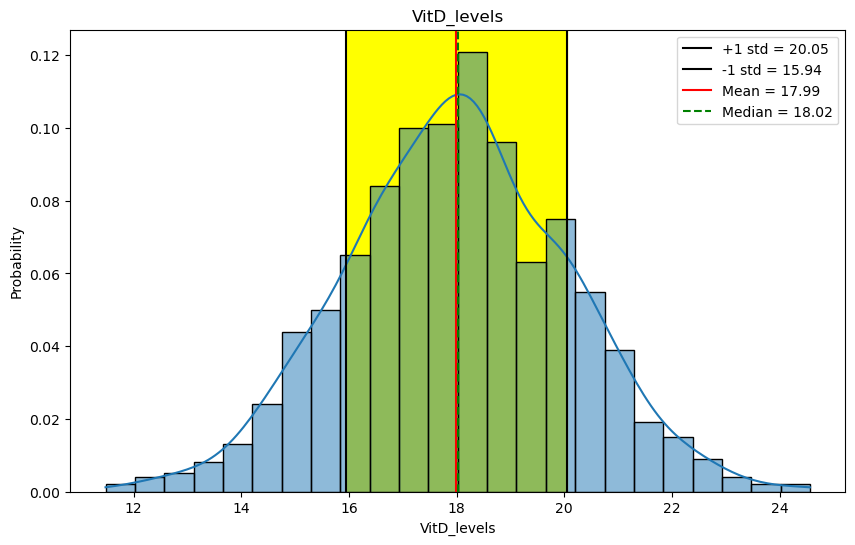

In [4]:
import matplotlib.pyplot as plt
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', discrete=False, kde = True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();


## Kurtosis

<img src="Data/Image.png" alt="Alternative text" align="left"/>

In [5]:
from scipy import stats

#Finding Kurtosis
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt


3.013147515833447

## Questions -

- Is it Discrete or Continuous? Answer: Continuous
- Does it have a skew? If so, which direction (+/-) Answer: no, skew is normal
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) Answer: Mesokurtic

# Distribution Plots for Doc_visits

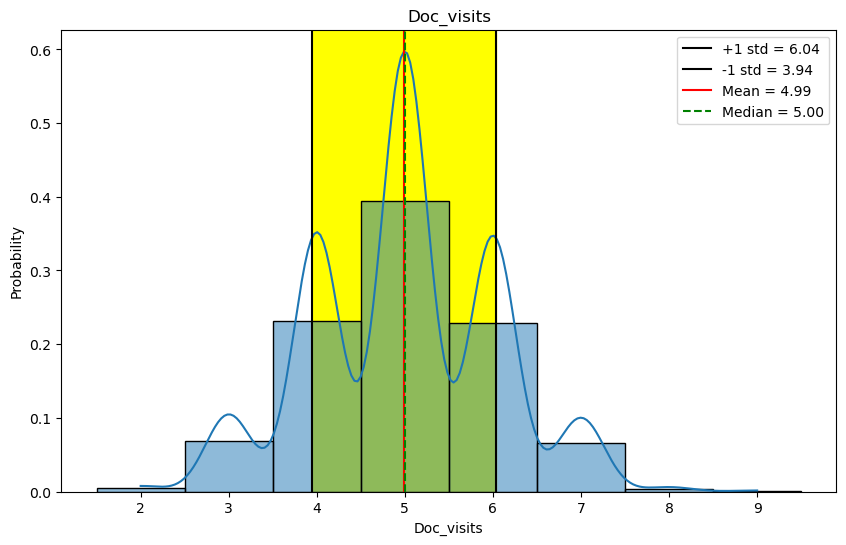

In [6]:
import matplotlib.pyplot as plt
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', discrete=True, kde = True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();


## Kurtosis

In [7]:
#Finding Kurtosis
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt


2.9919958083381206

## Questions -

- Is it Discrete or Continuous? Answer: Discrete because number of doctor visits can only be an integer i.e. can't be a a decimal number
- Does it have a skew? If so, which direction (+/-) Answer: no, skew is normal
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) Answer: Mesokurtic


# Distribution Plots for TotalCharge

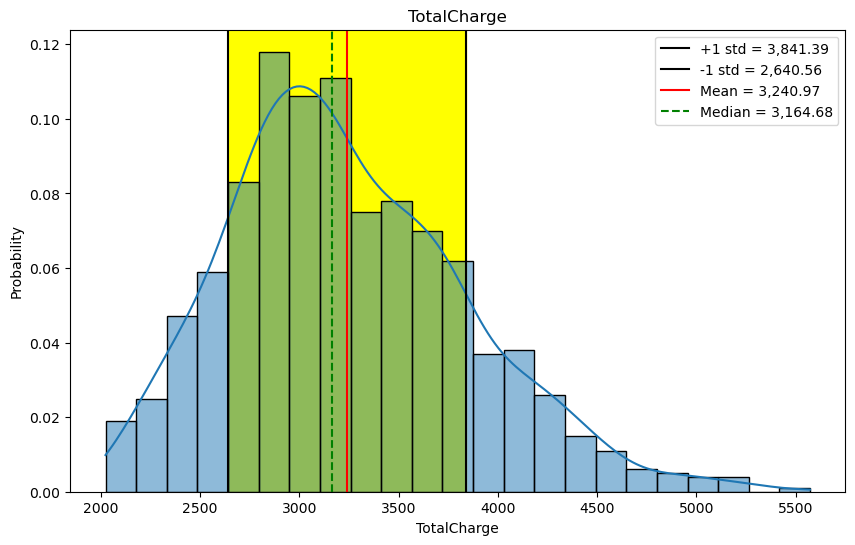

In [8]:
import matplotlib.pyplot as plt
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', discrete=False, kde = True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();


## Kurtosis

In [9]:
#Finding Kurtosis
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

## Questions -

- Is it Discrete or Continuous? Answer: Continous 
- Does it have a skew? If so, which direction (+/-) Answer: yes, positive skew
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) Answer: Leptokurtic